<a href="https://colab.research.google.com/github/zahra-zarrabi/houses_price_image_regression/blob/master/Houses_Price_Image_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.4

In [ ]:
import tensorflow as tf
import os
print(tf.__version__)
%cd /content/drive/My Drive/house_price

In [ ]:
# !git clone https://github.com/emanhamed/Houses-dataset

In [ ]:
%ls Houses-dataset/Houses_Dataset

In [4]:
!python cnn_regression.py --dataset Houses-dataset/Houses_Dataset

[INFO] loading house attributes...
[INFO] loading house images...
max price:  5858000
2021-10-01 12:42:47.331169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 12:42:47.906914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 12:42:47.907775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 12:42:47.909079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 12:42:47.909905: I tens



---


**Inference**

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1xU7lKwRcHIhobWe5i38-Zn68e0A0D_iA/house_price'

In [10]:
import numpy as np
import cv2
import glob
model=tf.keras.models.load_model('model_houseprice.h5')
Images=[]
outputImage = np.zeros((64,64,3),dtype='uint8')
housePaths = sorted(list(glob.glob('test_image/*')))
print(housePaths)
for image_name in housePaths:
  image = cv2.imread(image_name)
  image = cv2.resize(image,(32,32))
  Images.append(image)

outputImage[0:32,0:32]=Images[0]   #bathroom.jpg
outputImage[0:32,32:64]=Images[1]  #bedroom.jpg
outputImage[32:64,0:32]=Images[3]  #kitchen.jpg
outputImage[32:64,32:64]=Images[2] #frontal.jpg

outputImage = np.array(outputImage)
outputImage = outputImage/255

outputImage = outputImage.reshape(1,64,64,3)
pred = model.predict([outputImage])
# print(pred)
max_price = 5858000
print('Predicted House Prices :',pred[0][0] * max_price,'$')

['test_image/3_bathroom.jpg', 'test_image/3_bedroom.jpg', 'test_image/3_frontal.jpg', 'test_image/3_kitchen.jpg']
Predicted House Prices : 679989.226102829 $


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


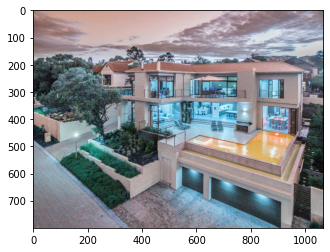

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Images[2])